# Using Unsupervised Learning to plan Kolkata Vacation: A Clustering Problem

# Preparing the data

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as Soup

In [2]:
map_kml = "doc.kml" # imported kml file from Google Maps
with open('doc.kml') as data:
    kml_soup = Soup(data, 'lxml-xml') # Parse as XML
coords = kml_soup.find_all('coordinates') # find all the coordinates
coords_list = []
for x in coords:
    coords_list.append(str(x)) # store the coordinates in a list

In [3]:
names = kml_soup.find_all('name') # find all the coordinates
names_list = []
for x in names:
    names_list.append(str(x)) # store the coordinates in a list

In [25]:
# create new dataframe
coord_col = ['Longitude', 'Latitude', 'Landmark']
df_coord = pd.DataFrame(columns=coord_col) 
# split coordinates list into coordinates to populate the dataframe
for i, j in zip(range(len(coords_list)), range(2, len(names_list))):
    item = coords_list[i]
    string_split = item.split(',')
    coord1 = float(string_split[0][26:])
    coord2 = float(string_split[1])
    coord3 = names_list[j][6:-7]
    df_coord.loc[i] = [coord1, coord2, coord3]

In [26]:
df_coord

,Longitude,Latitude,Landmark
0,88.395825,22.539056,"Science City, Kolkata"
1,88.365076,22.530593,Birla Mandir
2,88.412642,22.615286,PVR Diamond Plaza
3,88.406679,22.600130,Kolkata Time Zone Clock Tower
4,88.408501,22.588261,City Centre
5,88.371486,22.594733,Hatibagan Market
6,88.382502,22.605429,Parshwanath Jain Temple Belgachhiya
7,88.361505,22.598543,Kumortuli
8,88.412020,22.603462,Eco Nest
9,88.360173,22.593411,Shridhar Thakur Bari


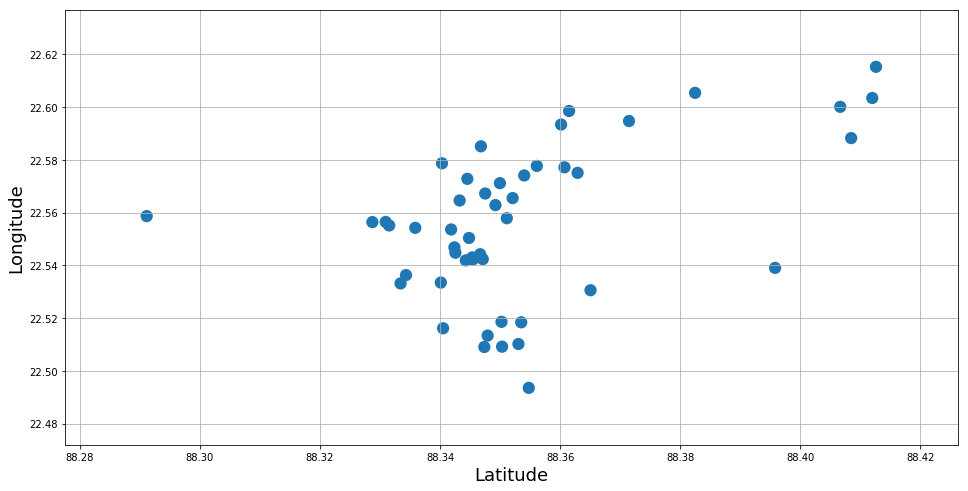

In [27]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(df_coord['Longitude'], df_coord['Latitude'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)
plt.grid()
plt.show()

In [28]:
from sklearn.cluster import KMeans # Importing KMeans
# Creating an instance of KMeans to find 10 clusters
kmeans_1 = KMeans(n_clusters=10)
# Using fit_predict to cluster the dataset
X = df_coord[['Longitude','Latitude']].values
predictions = kmeans_1.fit_predict(X) 

In [29]:
clustered = pd.concat([df_coord.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)

In [30]:
clustered.drop('index', axis=1, inplace=True)

In [31]:
conditions = [
    clustered['Cluster'] == 0, 
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8,
    clustered['Cluster'] == 9 ]
choices = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 
           'Sunday', 'Monday', 'Tuesday', 'Wednesday' ]
clustered['Vacation Day'] = np.select(conditions, choices, default='black')

In [32]:
clustered.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Vacation Day
44,88.346805,22.585148,Howrah Bridge,0,Monday
10,88.356129,22.577708,Nakhoda Masjid,0,Monday
11,88.360737,22.577189,Muhammad Ali Park,0,Monday
12,88.362919,22.575086,University of Calcutta,0,Monday
15,88.354024,22.574105,Tirreti Bazaar,0,Monday
23,88.342395,22.546844,Victoria Memorial Garden,1,Tuesday
26,88.347118,22.542388,Nehru Children's Museum,1,Tuesday
25,88.346682,22.544243,St. Paul's Cathedral,1,Tuesday
24,88.342558,22.544808,Victoria Memorial,1,Tuesday
29,88.344297,22.541909,Rabindra Sadan Garden &amp; Fountain,1,Tuesday


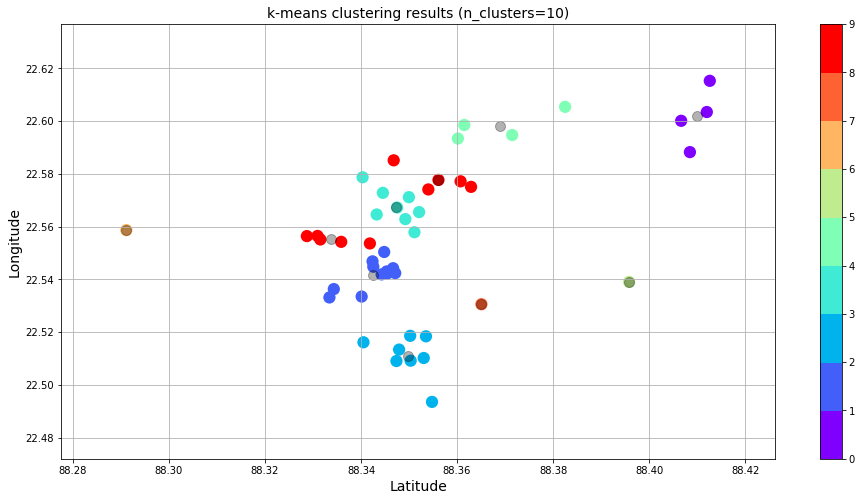

In [14]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.colorbar(ticks=np.linspace(0,9,10))
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
#plt.xlim(2.28, 2.375)
#plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('k-means clustering results (n_clusters=10)', fontsize=14)
plt.grid()
plt.show()

# HDBSCAN Clustering of Geo Locations

In [50]:
import hdbscan

In [144]:
rads = np.radians(X)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine')
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine', allow_single_cluster=True, approx_min_span_tree=True, algorithm='best', gen_min_span_tree=True, leaf_size=40, alpha=1.0)
#clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True, gen_min_span_tree=True, leaf_size=40, metric='euclidean', min_cluster_size=5, min_samples=None, p=None)
predictions = clusterer.fit_predict(rads)

In [145]:
clustered = pd.concat([df_coord.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)
clustered.drop('index', axis=1, inplace=True)
conditions = [
    clustered['Cluster'] == -1, 
    clustered['Cluster'] == 0,
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8 ]
choices = ['NA/Noise', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
           'Friday','Saturday', 'Sunday', 'Monday', 'Tuesday' ]
clustered['Vacation Day'] = np.select(conditions, choices, default='black')
clustered.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Vacation Day
0,88.395825,22.539056,"Science City, Kolkata",-1,NA/Noise
41,88.344549,22.572821,Millennium Park,-1,NA/Noise
5,88.371486,22.594733,Hatibagan Market,-1,NA/Noise
6,88.382502,22.605429,Parshwanath Jain Temple Belgachhiya,-1,NA/Noise
42,88.291121,22.558687,Acharya Jagadish Chandra Bose Indian Botanic G...,-1,NA/Noise
45,88.328724,22.556412,Vidyasagar Setu,-1,NA/Noise
10,88.356129,22.577708,Nakhoda Masjid,-1,NA/Noise
3,88.406679,22.600130,Kolkata Time Zone Clock Tower,0,Monday
4,88.408501,22.588261,City Centre,0,Monday
2,88.412642,22.615286,PVR Diamond Plaza,1,Tuesday


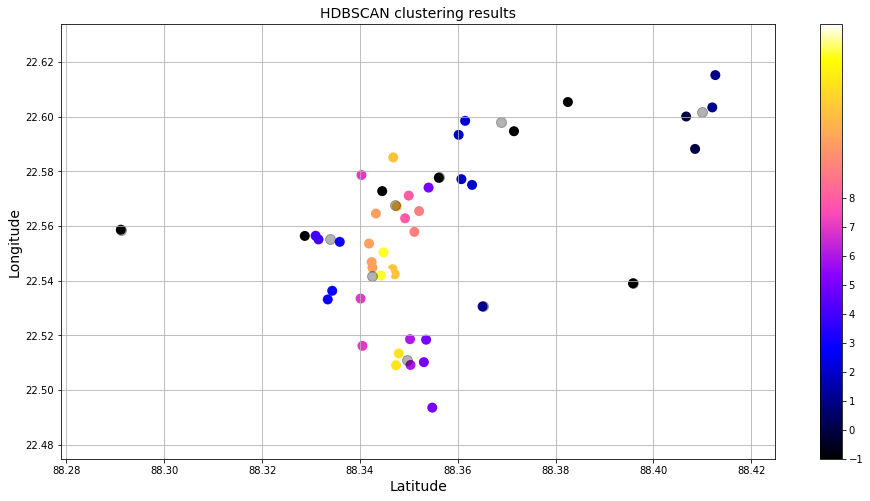

In [146]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.gnuplot2
#norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, s=100, edgecolor='none')
plt.colorbar(ticks=[-1,0,1,2,3,4,5,6,7,8])
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
#plt.xlim(2.28, 2.375)
#plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('HDBSCAN clustering results', fontsize=14)
plt.grid()
plt.show()

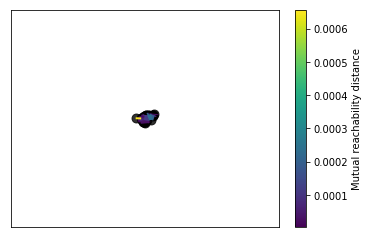

In [147]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=1,
                                      node_size=80,
                                      edge_linewidth=2)